In [27]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("../../../estsoft/data/train.csv")
df_gas = pd.read_csv("../../../estsoft/data/gas_prices.csv")
df_elec = pd.read_csv("../../../estsoft/data/electricity_prices.csv")
print(f"data size: {len(df_train)}")
display(df_train.head())

data size: 2018352


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [11]:
df_train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [15]:
#print(df_train.isnull().sum())
#print(df_gas.isnull().sum())
print(df_elec.isnull().sum())

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64


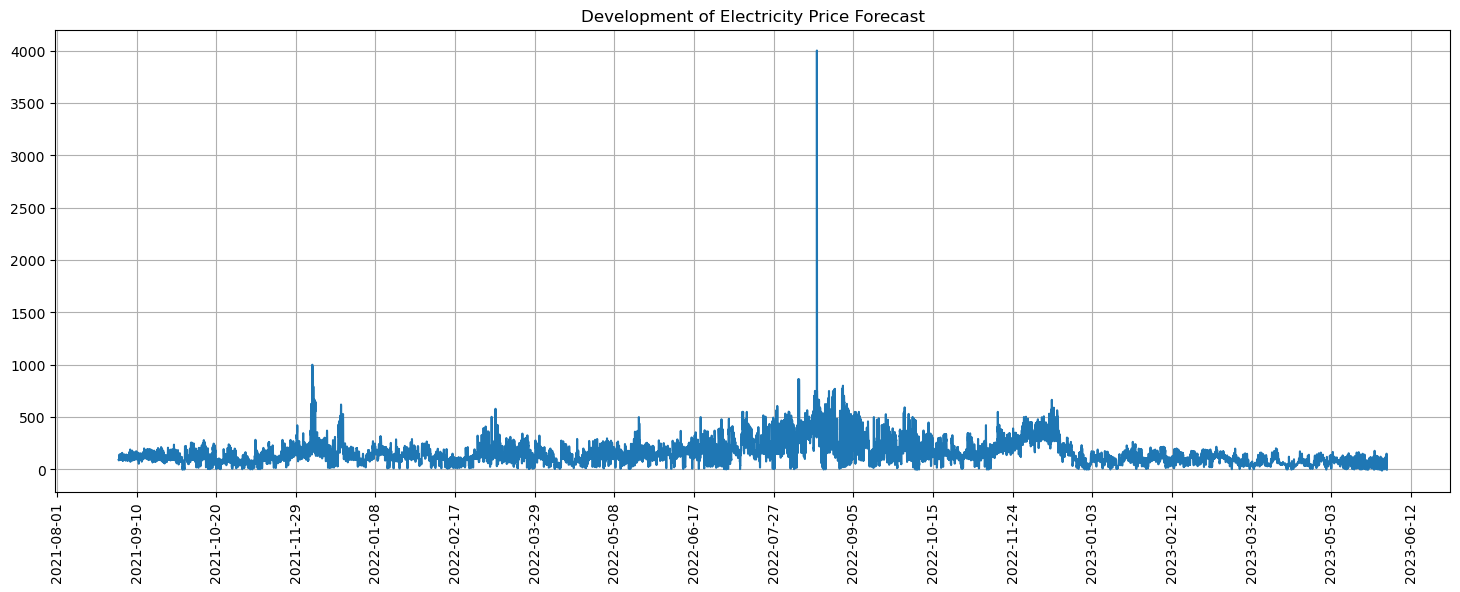

In [42]:
# plot time series
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(df_elec.forecast_date, df_elec.euros_per_mwh)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.title('Development of Electricity Price Forecast')
plt.grid()
plt.show()
#sns.lineplot(x='forecast_date', y='euros_per_mwh', data=df_elec)

<Axes: xlabel='월별', ylabel='euros_per_mwh'>

/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


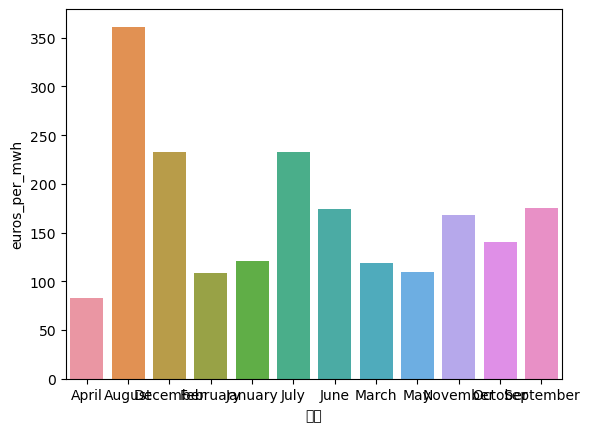

In [38]:
df_elec['forecast_date'] = pd.to_datetime(df_elec['forecast_date'])
df_elec['월별'] = df_elec['forecast_date'].dt.month

# 월별 데이터로 그룹화하여 평균 계산
df_elec['월별'] = df_elec['월별'].apply(lambda x: pd.Timestamp(2022, x, 1).strftime('%B'))

# 월별 데이터로 그룹화하여 평균 계산
monthly_data = df_elec.groupby('월별')['euros_per_mwh'].mean().reset_index()

# Seaborn을 사용하여 월별 평균 가격 시각화
sns.barplot(x='월별', y='euros_per_mwh', data=monthly_data)

In [39]:
train_nan_ = df_train.isnull().sum()
df_train.dropna(inplace=True)
print(df_gas.isnull().sum())
train_nan = pd.DataFrame(dict(before=train_nan_, after=df_train.isnull().sum()))
display(train_nan.T)

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
before,0,0,0,528,0,0,0,0,0
after,0,0,0,0,0,0,0,0,0


In [3]:
def extend_datetime_features(df, col_dt="datetime", datetime_offset=None):
    df[col_dt] = pd.to_datetime(df[col_dt])
    if not datetime_offset:
        datetime_offset = df[col_dt].min()
    df["date"] = df[col_dt].dt.date
    df["date_year"] = df[col_dt].dt.year
    df["date_month"] = df[col_dt].dt.month
    df["date_day"] = df[col_dt].dt.day
    df["date_dayofyear"] = df[col_dt].dt.dayofyear
    df["date_dayofweek"] = df[col_dt].dt.dayofweek
    df["date_weekday"] = df[col_dt].dt.weekday
    df["time_hour"] = df[col_dt].dt.hour
    df["time_minute"] = df[col_dt].dt.minute
    df["date_delta"] = (df[col_dt] - datetime_offset).dt.days
    df["time_delta"] = df[col_dt].dt.hour + (df[col_dt].dt.minute / 60.)
    return datetime_offset

datetime_offset = extend_datetime_features(df_train)
display(df_train.head())

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,date_year,date_month,date_day,date_dayofyear,date_dayofweek,date_weekday,time_hour,time_minute,date_delta,time_delta
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021-09-01,2021,9,1,244,2,2,0,0,0,0.0


<Axes: xlabel='target', ylabel='Frequency'>

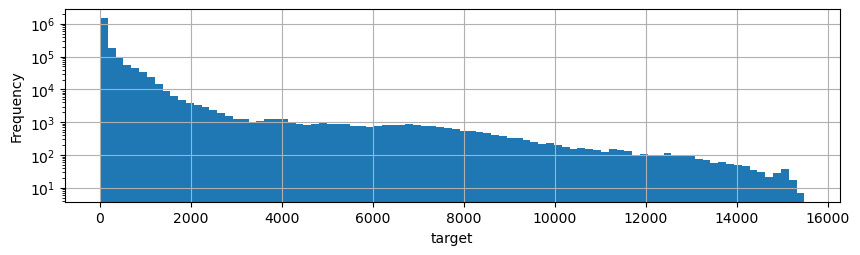

In [4]:
fig = plt.figure(figsize=(10, 2.5))
# sns.histplot(data=df_train, x=col, hue="target_", ax=fig.gca())
df_train["target"].plot.hist(ax=fig.gca(), bins=90, logy=True, xlabel="target", grid=True)

/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/estsoft/miniconda3/envs/leejo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


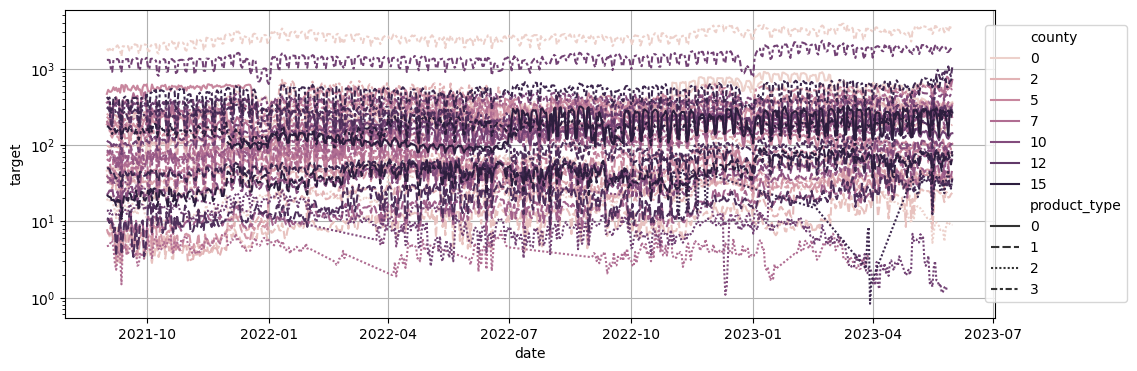

In [5]:
df_train_ = df_train.groupby(["date", "product_type", "county"])["target"].mean().reset_index(name="target")
# display(df_train_)

fig = plt.figure(figsize=(12, 4))
ax = sns.lineplot(data=df_train_, x='date', y='target', style="product_type", hue="county", ax=fig.gca())
ax.grid(), ax.set_yscale('log')
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))